In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


# First Fig

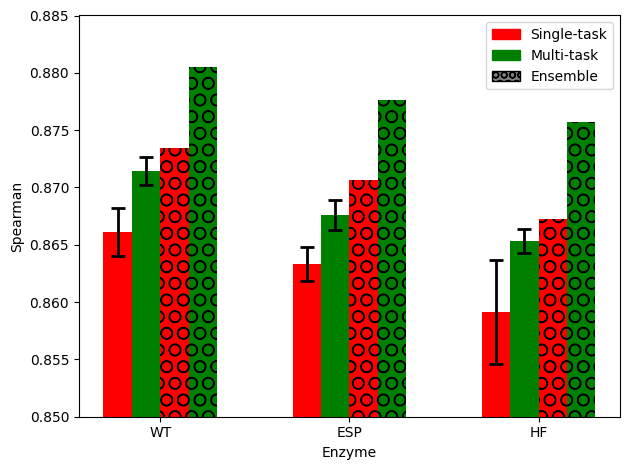

In [200]:
# Adjusted sample data to match the new order
data = {
    'WT': [(0.866129327, 0.002073498), (0.871410252, 0.001224376), (0.873438202, None), (0.880479122, None)],
    'ESP': [(0.863328868, 0.001447701), (0.867588501, 0.001287511), (0.870692818, None), (0.877605318, None)],
    'HF': [(0.859150978, 0.004511548), (0.865328354, 0.001006483), (0.867265678, None), (0.875705564, None)],
}

approaches = ['ST No Ens', 'MT No Ens', 'ST Ens', 'MT Ens']

# Plot setup
num_enzymes = len(data)
num_approaches = len(approaches)
index = np.arange(num_enzymes)  # Enzyme indices
bar_width = 0.15  # Width of a single bar

fig, ax = plt.subplots()

# Colors and patterns adjusted for the new order
colors = ['red', 'green', 'red', 'green']
hatch_patterns = ['', '', 'O', 'O']  # Circles for ensemble

for i, approach in enumerate(approaches):
    means = [data[enzyme][i][0] for enzyme in data]
    stds = [data[enzyme][i][1] if data[enzyme][i][1] is not None else 0 for enzyme in data]
    bars = ax.bar(index + i*bar_width, means, bar_width, color=colors[i], 
                  label=approach, hatch=hatch_patterns[i])
    # Add error bars only if standard deviation is provided
    error_config = {'elinewidth': 2, 'capsize': 5, 'capthick': 2, 'fmt': 'none', 'color': 'black'}
    for j, std in enumerate(stds):
        if std > 0:  # Check if std is not zero, indicating it was provided
            ax.errorbar(index[j] + i*bar_width, means[j], yerr=std, **error_config)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Enzyme')
ax.set_ylabel('Spearman')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(list(data.keys()))

# Custom legend for task and ensemble type, with adjustments
legend_elements = [
    mpatches.Patch(color='red', label='Single-task'),
    mpatches.Patch(color='green', label='Multi-task'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='OO', label='Ensemble')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_ylim(0.850, 0.885)
plt.tight_layout()

# save with high dpi
plt.savefig('first_plot.png', dpi=800)
plt.show()

# More Figs

In [201]:
def get_dict_avg_std(filename, datasets, categories, is_various=False):
    data = pd.read_csv(filename)
    dict_average = {}
    dict_std = {}

    for category in categories:
        dict_average[category] = []
        dict_std[category] = []

    for dataset in datasets:
        
  
        dataset_columns = [col for col in data.columns if dataset in col]
        std_column = [col for col in dataset_columns if 'Std' in col]
        average_column = [col for col in dataset_columns if 'Average' in col]
        #print(f'{dataset_columns} {std_column} {average_column}')

        for category in categories:
            #print(f'{category} {dataset}')
            if is_various and dataset == 'leenay':
                dict_average[category].append(0)
                dict_std[category].append(0)
                continue
            
            if is_various:
                category_row = data[data['method'] == category]
            else:
                category_row = data[data['TL METHOD'] == category]
            avg_value = category_row[average_column].values[0,0]
            std_value = category_row[std_column].values[0,0]
            dict_average[category].append(avg_value)
            dict_std[category].append(std_value)

    return dict_average, dict_std





In [202]:
# Example datasets and categories
original_datasets = ['xu2015TrainHl60',
            'chari2015Train293T',
            'hart2016-Rpe1Avg',
            'hart2016-Hct1162lib1Avg',
            'hart2016-HelaLib1Avg',
            'hart2016-HelaLib2Avg',
            'xu2015TrainKbm7',
            'doench2014-Hs',
            'doench2014-Mm',
            'doench2016_hg19',
            'doench2016plx_hg19',
            'morenoMateos2015',
            'leenay']
 # reordered
original_datasets = ['doench2014-Hs',
            'doench2014-Mm',
            'xu2015TrainHl60',
            'xu2015TrainKbm7',
            'doench2016_hg19',
            'doench2016plx_hg19',
            'chari2015Train293T',
            'hart2016-Rpe1Avg',
            'hart2016-HelaLib2Avg',
            'hart2016-Hct1162lib1Avg',
            'hart2016-HelaLib1Avg',
            'morenoMateos2015',
            'leenay']


datasets = []
IDEAL_LENGTH = 26
for dataset in original_datasets:
    # add spaces to the end of the dataset name to make it IDEAL_LENGTH long
    dataset += ' ' * (IDEAL_LENGTH - len(dataset))
    datasets.append(dataset)

categories_tl = ['gl_tl', 'full_tl', 'no_em_tl', 'LL_tl', 'no_tl', 'no_pre_train']

data_means_deephf,  data_stds_deephf= get_dict_avg_std('results_dhf.csv', original_datasets, categories_tl)
data_means_crispron, data_stds_crispron= get_dict_avg_std('results_co.csv', original_datasets, categories_tl)

categories_various = ['wuCrispr', 'wang', 'doench', 'chariRaw']
data_means_various, data_stds_various= get_dict_avg_std('results_various.csv', original_datasets, categories_various, is_various = True)


print(data_means_deephf)

{'gl_tl': [0.63394, 0.60246, 0.62374, 0.63904, 0.4054, 0.32804, 0.36084, 0.33372, 0.4833, 0.47768, 0.42914, 0.40478, 0.26702], 'full_tl': [0.64532, 0.61058, 0.6245, 0.63952, 0.40636, 0.3318, 0.42014, 0.33408, 0.48726, 0.48032, 0.43224, 0.41438, 0.26798], 'no_em_tl': [0.63528, 0.59846, 0.62376, 0.63808, 0.4058, 0.3292, 0.41602, 0.3309, 0.4793, 0.47736, 0.42874, 0.38606, 0.2518], 'LL_tl': [0.6337, 0.60262, 0.62334, 0.63858, 0.40584, 0.32644, 0.34966, 0.33386, 0.48326, 0.47722, 0.42918, 0.39898, 0.24866], 'no_tl': [0.62744, 0.5837, 0.6174, 0.62996, 0.40164, 0.32292, 0.43494, 0.31876, 0.47064, 0.47324, 0.42452, 0.26166, 0.19642], 'no_pre_train': [0.29066, 0.18456, 0.31044, 0.34294, 0.24312, 0.22792, 0.03328, 0.08882, 0.17932, 0.1484, 0.09286, 0.2748, 0.11778]}


## TL Comparison

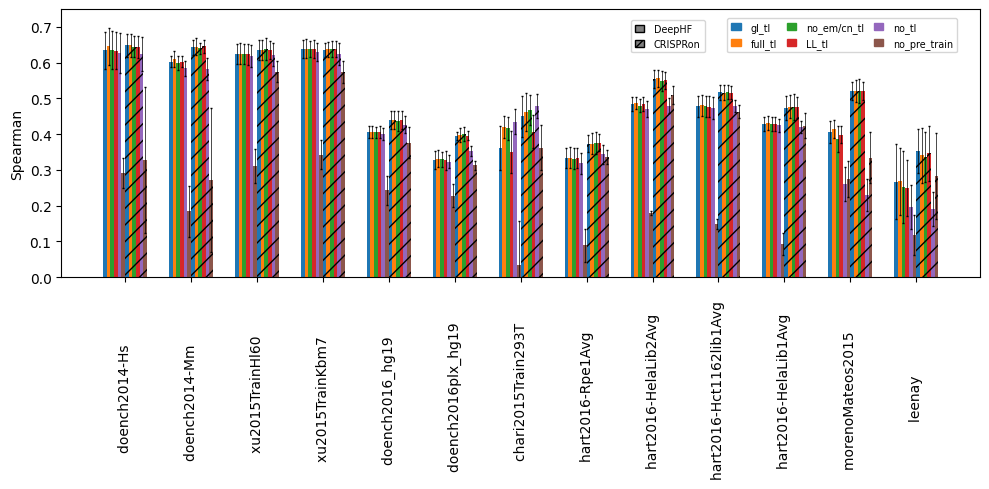

In [203]:



hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']



num_datasets = len(datasets)
num_categories = len(categories_tl)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width / 2  # half for normal, half for OO texture
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories_tl):
    plt.bar(index + i * bar_width, data_means_deephf[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds_deephf[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Plot bars for OO texture model with 'hatch' pattern
for i, category in enumerate(categories_tl):
    plt.bar(index + (i+6) * bar_width , data_means_crispron[category], bar_width, 
            label=f'{category} (OO Texture)', hatch='//', yerr=data_stds_crispron[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})
# Add labels, title, and legend
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
plt.xticks(index-bar_width*3.5 + total_width / 2, datasets, rotation=90)


legend_1_elements = [
    mpatches.Patch(color=hex_colors[0], label='gl_tl'),
    mpatches.Patch(color=hex_colors[1], label='full_tl'),
    mpatches.Patch(color=hex_colors[2], label='no_em/cn_tl'),
    mpatches.Patch(color=hex_colors[3], label='LL_tl'),
    mpatches.Patch(color=hex_colors[4], label='no_tl'),
    mpatches.Patch(color=hex_colors[5], label='no_pre_train'),]


legend_2_elements = [
    mpatches.Patch(facecolor='grey', edgecolor='k', label='DeepHF'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='//', label='CRISPRon')]

legend1 = plt.legend(handles=legend_1_elements, loc='lower center', bbox_to_anchor=(0.85, 0.82), ncol=3,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

plt.gca().add_artist(legend1)

plt.legend(handles=legend_2_elements, loc='lower center', bbox_to_anchor=(0.66, 0.82), ncol=1,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)



# make figure bigger
plt.gcf().set_size_inches(10, 5)

# set y axis limits
plt.ylim(0.0, 0.75)
# make figure bigger

# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part1.svg', dpi=400)

# Show the plot
plt.show()


## VS Other Methods

0.272880714


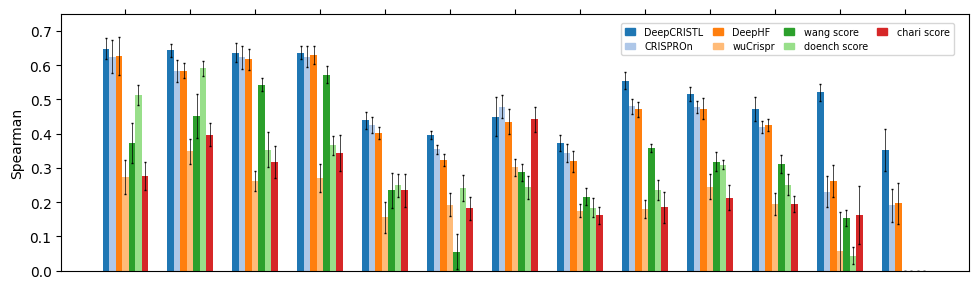

In [204]:
# Example datasets and categories
categories = ['DeepCRISTL', 'CRISPROn', 'DeepHF', 'wuCrispr', 'wang score', 'doench score', 'chari score']

# Mean Spearman scores for two models (normal and with 'OO' texture)
data_means = {
    'DeepCRISTL': data_means_crispron['gl_tl'],
    'CRISPROn': data_means_crispron['no_tl'],
    'DeepHF': data_means_deephf['no_tl'],
    'wuCrispr': data_means_various['wuCrispr'],
    'wang score': data_means_various['wang'],
    'doench score': data_means_various['doench'],
    'chari score': data_means_various['chariRaw'],
}



# Standard deviations for each category
data_stds = {
    'DeepCRISTL':  data_stds_crispron['gl_tl'],
    'CRISPROn':  data_stds_crispron['no_tl'],
    'DeepHF':  data_stds_deephf['no_tl'],
    'wuCrispr':  data_stds_various['wuCrispr'],
    'wang score':  data_stds_various['wang'],
    'doench score':  data_stds_various['doench'],
    'chari score':  data_stds_various['chariRaw'],
}

print(data_means['wuCrispr'][0])




#hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
#hex_colors = ['#1f77b4', '#f0e442', '#17becf', '#bcbd22', '#e7ba52', '#7f7f7f', '#dbdb8d']
#hex_colors = ['#1f77b4', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725']
#hex_colors = ['#1f77b4', '#e377c2', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e']

# take hex colors from a colormap
#hex_colors = plt.cm.tab10.colors

# different one
hex_colors = plt.cm.tab20.colors



num_datasets = len(datasets)
num_categories = len(categories)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width 
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, data_means[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Add labels, title, and legend
# show x label on top
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
#plt.xticks(index-bar_width*2+ total_width / 2, datasets, rotation=90)
# same but xticks are above the bars
#plt.xticks(index-bar_width*2 + total_width / 2, None)
# remove xticks
plt.xticks([])


legend_elements = [
    mpatches.Patch(color=hex_colors[0], label='DeepCRISTL'),
    mpatches.Patch(color=hex_colors[1], label='CRISPROn'),
    mpatches.Patch(color=hex_colors[2], label='DeepHF'),
    mpatches.Patch(color=hex_colors[3], label='wuCrispr'),
    mpatches.Patch(color=hex_colors[4], label='wang score'),
    mpatches.Patch(color=hex_colors[5], label='doench score'),
    mpatches.Patch(color=hex_colors[6], label='chari score'),
]





plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.8, 0.82), ncol=4,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

# make figure bigger
plt.gcf().set_size_inches(10, 3)

# set y axis limits
plt.ylim(0.0, 0.75)

# show x axis on top
plt.gca().xaxis.set_ticks_position('top')

plt.xticks(index-bar_width*2 + total_width / 2, [], rotation=90)



# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part2.svg', dpi=400)

# Show the plot
plt.show()


In [205]:
# # combine
# from PIL import Image
# def merge_images_vertically(img_path1, img_path2, output_path):
#     # Open the images
#     image1 = Image.open(img_path1)
#     image2 = Image.open(img_path2)
    
#     # Calculate the size of the output image
#     width = max(image1.width, image2.width)
#     height = image1.height + image2.height
    
#     # Create a new image with the calculated size
#     new_image = Image.new('RGB', (width, height))
    
#     # Paste the first image at the top
#     new_image.paste(image1, (0, 0))
    
#     # Paste the second image below the first one
#     new_image.paste(image2, (0, image1.height))
    
#     # Save the new image
#     new_image.save(output_path)


# import xml.etree.ElementTree as ET

# def merge_svgs_vertically(svg_path1, svg_path2, output_path):
#     # Parse the SVG files
#     tree1 = ET.parse(svg_path1)
#     root1 = tree1.getroot()
#     tree2 = ET.parse(svg_path2)
#     root2 = tree2.getroot()

#     # Extract width and height from the first SVG
#     width1 = int(root1.get('width', '0').replace('px', ''))
#     height1 = int(root1.get('height', '0').replace('px', ''))

#     # Extract width and height from the second SVG
#     width2 = int(root2.get('width', '0').replace('px', ''))
#     height2 = int(root2.get('height', '0').replace('px', ''))

#     # Calculate the new width and height
#     new_width = max(width1, width2)
#     new_height = height1 + height2

#     # Create a new SVG root element
#     new_svg = ET.Element('svg', width=str(new_width), height=str(new_height), xmlns="http://www.w3.org/2000/svg")

#     # Add all elements from the first SVG to the new SVG
#     for element in root1:
#         new_svg.append(element)

#     # Adjust Y coordinates for the elements from the second SVG and add them
#     for element in root2:
#         if 'y' in element.attrib:
#             element.attrib['y'] = str(int(element.attrib['y']) + height1)
#         new_svg.append(element)

#     # Create a new tree from the new SVG
#     new_tree = ET.ElementTree(new_svg)

#     # Write the new SVG file
#     new_tree.write(output_path)

# # Example usage
# merge_svgs_vertically('part1.svg', 'part2.svg', 'combined.svg')


# # Show the combined image



# # delete all 3 images
# import os
# os.remove('part1.png')
# os.remove('part2.png')
# #os.remove('combined.png')

# Image.open('combined.png')


# LOSS GRAPHS

In [206]:
def show_loss_graph_zoomed(val_loss, train_loss, title, early_stopping=15, context_window=0, save_name= None, no_early_stopping=False, ll_train_line = None, ll_val_line = None, first_number=0, jumps=10):
    last_epoch = len(val_loss)
    early_stopping_epoch = last_epoch - early_stopping - 1 if early_stopping is not None else None

    # Main plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(val_loss, label='Validation loss')
    ax.plot(train_loss, label='Training loss')

    # if first number is not 0 then we have to adjust the x axis
    if first_number != 0:
        num_epochs = len(val_loss)
        ax.set_xticks(np.arange(first_number, num_epochs, jumps))

    if ll_train_line is not None:
        # orange
        ax.axhline(y=ll_train_line, color='C1', linestyle='--', label='LL Training loss')
    if ll_val_line is not None:
        ax.axhline(y=ll_val_line, color='C0', linestyle='--', label='LL Validation loss')

    # Add vertical line for early stopping
    if early_stopping_epoch is not None:
        if not no_early_stopping:
            ax.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early stopping')
        #ax.set_title(title, fontsize=20)
        ax.legend(fontsize=11)

    # add axis labels
    ax.set_xlabel('Epoch', fontsize=16)
    ax.set_ylabel('Loss', fontsize=16)
    
    if context_window == 0:
        if save_name is not None:
            plt.savefig(save_name, dpi=800)

        plt.show()
   
        return
    
    # if not no_early_stopping:
    #     # put a circle around the early stopping point
    #     if early_stopping_epoch is not None:
    #         ax.plot(early_stopping_epoch, val_loss[early_stopping_epoch], 'ro')



    # Inset plot around the early stopping point
    if early_stopping_epoch is not None:
        # Calculate start and end indices for the zoomed context
        start_index = max(0, early_stopping_epoch - context_window)
        end_index = min(len(val_loss), early_stopping_epoch + context_window + 1)

        if first_number != 0:
            real_start_index = first_number + start_index
            real_end_index = first_number + end_index

            



        # Define the position and size of the inset
        ax_inset = fig.add_axes([0.35, 0.5, 0.25, 0.25])
        ax_inset.plot(range(real_start_index, real_end_index), val_loss[start_index:end_index], label='Validation loss zoomed')
        ax_inset.plot(range(real_start_index, real_end_index), train_loss[start_index:end_index], label='Training loss zoomed')
        
        if first_number != 0:
            ax_inset.set_xticks(np.arange(real_start_index, real_end_index, 5))
        if not no_early_stopping:
            # Optionally add vertical line in the inset for early stopping
            ax_inset.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early stopping')





    # save high dpi
    if save_name is not None:
        plt.savefig(save_name, dpi=800)

    plt.show()



In [207]:
dhf_pretrain_val_loss = [0.022885681033612677,0.0179318568972083,0.015000633442549895,0.013823838711870455,0.013431630303450985,0.012355583455559989,0.011710438553153242,0.011681079148273772,0.011136771038039324,0.010930555339724729,0.010976315625443142,0.011180962261927758,0.011534226778513793,0.010210425284971127,0.010746166509822545,0.010339727735896613,0.010376187550992242,0.010767879189708182,0.009980385546463603,0.009631456839274598,0.0096763689253951,0.009722706833067403,0.009809498501516925,0.010422310735489377,0.009691372014444786,0.009870455553196772,0.009683607542441778,0.009684836504465909]
dhf_pretrain_train_loss = [1.1699221701180968,0.022326279213918606,0.018717740942075536,0.01670049042045197,0.015403969675829094,0.01450927462108578,0.013940963592155449,0.013313015797647284,0.012746961690259344,0.012399638173734058,0.011941492523027142,0.011588198273059352,0.011279899936046273,0.011013761997471715,0.01076021665207427,0.01051832499967893,0.010220400152182937,0.01006008058778606,0.009883610816570158,0.009610534333871242,0.009393905226432603,0.009243086417953955,0.00901439040846025,0.008884999297062811,0.008690175217635399,0.008110176473028988,0.007947839973691515,0.007812525775987044]

dhf_moreno_val_loss = [0.09190519899129868, 0.08347360044717789, 0.08111526072025299, 0.08106289803981781, 0.07901716232299805, 0.07756617665290833, 0.0752100795507431, 0.07414261996746063, 0.07444396615028381, 0.07389181107282639, 0.07464832067489624, 0.07609353214502335, 0.07566380500793457, 0.07833698391914368, 0.0769779309630394, 0.07922240346670151, 0.08024492114782333, 0.07789719849824905, 0.0813499465584755, 0.08226680755615234, 0.08219097554683685, 0.08549071848392487, 0.08366390317678452, 0.08973275870084763, 0.0854044258594513]
dhf_moreno_train_loss = [0.08033473064907554, 0.06548112752486249, 0.059220638455582314, 0.05526184148731686, 0.05134435778572446, 0.04677807222925076, 0.04495238895420314, 0.04085456699031551, 0.038384415386688145, 0.033685793403257315, 0.03193134026361161, 0.027324972496855827, 0.025411236689102893, 0.024570594269300805, 0.02349290469674026, 0.02152508506107898, 0.019778908021291907, 0.018441728728056765, 0.017445437527787523, 0.01696370863894216, 0.015369992126666364, 0.015531463605560819, 0.014502439495860314, 0.014074149300806782, 0.013422275849041484]



# dhf_hart_val_loss= [0.020412371274741256, 0.0210884201395161, 0.020544171607231394, 0.02050315879066201]
# dhf_hart_train_loss= [0.02369166519274016, 0.020475232608947055, 0.01916417980070564, 0.018377104286571317]



co_pretrain_val_loss= [0.12948855757713318, 0.13990989327430725, 0.2754133343696594, 0.17654091119766235, 0.10533285140991211, 0.08631645143032074, 0.07348386943340302, 0.06375627964735031, 0.0677984431385994, 0.06107209622859955, 0.048137519508600235, 0.04591619223356247, 0.04344737157225609, 0.038570187985897064, 0.03729259967803955, 0.03742755576968193, 0.037760116159915924, 0.03918445110321045, 0.041021570563316345, 0.04355974495410919, 0.04692710563540459, 0.051189322024583817, 0.05419018119573593, 0.05585609748959541, 0.056579455733299255, 0.058719899505376816, 0.06200661510229111, 0.06760088354349136, 0.07004023343324661, 0.07003576308488846, 0.06812387704849243, 0.06538194417953491, 0.0623372457921505, 0.06029693782329559, 0.05996648222208023, 0.060871705412864685, 0.06234298273921013, 0.06308934837579727, 0.06353701651096344, 0.06362277269363403, 0.06402817368507385, 0.06480145454406738, 0.06476014107465744, 0.06552200019359589, 0.06646253913640976, 0.06764571368694305, 0.06856100261211395, 0.06896894425153732, 0.07010916620492935, 0.0717911645770073, 0.07188829779624939, 0.07202711701393127, 0.07253292202949524, 0.07379422336816788, 0.07446104288101196, 0.07461341470479965, 0.07499261200428009, 0.07506567984819412, 0.07479090988636017, 0.07480990141630173, 0.07523728162050247, 0.07574771344661713, 0.07567764818668365, 0.07533548027276993, 0.07553412765264511, 0.07549762725830078, 0.07444784045219421, 0.07450678944587708, 0.07452381402254105, 0.07456880807876587, 0.07406549155712128, 0.0733305886387825, 0.07277423143386841, 0.07287662476301193, 0.0724853053689003, 0.07232251018285751, 0.07171829044818878, 0.07031231373548508, 0.06987743824720383, 0.06975753605365753, 0.06995200365781784, 0.06942883133888245, 0.0695609599351883, 0.06891009956598282, 0.06841257959604263, 0.06810332834720612, 0.06794735044240952, 0.0678921490907669, 0.06728215515613556, 0.06683871895074844, 0.06682952493429184, 0.06632336229085922, 0.06653153896331787, 0.0654928982257843, 0.06531545519828796, 0.06481382250785828, 0.06398032605648041, 0.06375018507242203, 0.06315521150827408, 0.06302396208047867, 0.06289196014404297, 0.06309210509061813, 0.06296670436859131, 0.06279277056455612, 0.06241678446531296, 0.06208294630050659, 0.06130018085241318, 0.060942452400922775, 0.061432383954524994, 0.06091977655887604, 0.06097913533449173, 0.06039860472083092, 0.05947982147336006, 0.05937912315130234, 0.058863211423158646]
co_pretrain_train_loss= [3.6127820014953613, 2.601445198059082, 2.139753580093384, 2.062720537185669, 1.7450767755508423, 1.6541364192962646, 1.4385132789611816, 1.2891674041748047, 1.0591404438018799, 0.9312352538108826, 0.8413809537887573, 0.7498628497123718, 0.6389631032943726, 0.5683907270431519, 0.5110883712768555, 0.4407952129840851, 0.41231420636177063, 0.35932791233062744, 0.3471657335758209, 0.32111766934394836, 0.2799476981163025, 0.25821664929389954, 0.23693536221981049, 0.22260785102844238, 0.21028439700603485, 0.19866609573364258, 0.20092594623565674, 0.17826686799526215, 0.16927777230739594, 0.16039912402629852, 0.14802104234695435, 0.14378154277801514, 0.1408250629901886, 0.14122499525547028, 0.12805554270744324, 0.12258967012166977, 0.12397386133670807, 0.12234558165073395, 0.1190667450428009, 0.11308816075325012, 0.11127876490354538, 0.10904739797115326, 0.10352920740842819, 0.10189423710107803, 0.0993114486336708, 0.09679780155420303, 0.09693914651870728, 0.09200380742549896, 0.09490831941366196, 0.09042348712682724, 0.09244619309902191, 0.08595459908246994, 0.08849334716796875, 0.08609248697757721, 0.080816850066185, 0.07968765497207642, 0.08301323652267456, 0.08339904248714447, 0.07896582037210464, 0.08029869943857193, 0.07806786894798279, 0.07444237172603607, 0.07940693199634552, 0.07573781162500381, 0.07588827610015869, 0.07373656332492828, 0.07463061064481735, 0.0734686329960823, 0.07154139876365662, 0.07091806083917618, 0.07190532982349396, 0.07256414741277695, 0.06843285262584686, 0.07109816372394562, 0.06832733005285263, 0.06735257804393768, 0.06863439083099365, 0.06706371903419495, 0.06499882787466049, 0.06667830049991608, 0.06939025968313217, 0.0678909420967102, 0.06347042322158813, 0.06472267210483551, 0.06257127970457077, 0.06626780331134796, 0.06387300044298172, 0.06316321343183517, 0.06329560279846191, 0.06585853546857834, 0.06304744631052017, 0.061354927718639374, 0.06271088123321533, 0.058537889271974564, 0.06175609305500984, 0.060010138899087906, 0.06110404059290886, 0.060165975242853165, 0.059730127453804016, 0.060164790600538254, 0.05930760130286217, 0.05932231992483139, 0.058738403022289276, 0.058509863913059235, 0.058779265731573105, 0.057647209614515305, 0.05601761117577553, 0.05801794305443764, 0.05834765359759331, 0.05778766795992851, 0.05861467123031616, 0.055107519030570984, 0.05561361461877823, 0.0534411184489727, 0.05449618771672249]

# co_moreno_gl_train_loss =  [0.01965385302901268, 0.01908126473426819, 0.017753412947058678, 0.016738394275307655, 0.01610308326780796, 0.015566310845315456, 0.016128268092870712, 0.015703754499554634, 0.015185761265456676, 0.014716019853949547, 0.014001216739416122, 0.013555771671235561, 0.01317925937473774, 0.013475305400788784, 0.013478185050189495, 0.012183151207864285, 0.012633177451789379]
# co_moreno_gl_val_loss =  [0.017122240737080574, 0.01539758313447237, 0.015603703446686268, 0.01583295688033104, 0.015815408900380135, 0.015831608325242996, 0.016054818406701088, 0.019492780789732933, 0.01635860651731491, 0.01545119658112526, 0.015646817162632942, 0.017557401210069656, 0.016151530668139458, 0.015564831905066967, 0.015483498573303223, 0.015485852025449276, 0.0154407424852252]



# co_moreno_ll_train_loss = [1892.2933349609375, 1318.64794921875, 961.9529418945312, 665.1350708007812, 467.9816589355469, 308.4739074707031, 194.797607421875, 119.98736572265625, 68.60736083984375, 38.27987289428711, 24.304540634155273, 19.861413955688477, 15.264697074890137, 13.918749809265137, 10.593826293945312, 8.567323684692383, 7.616972923278809, 6.432121753692627, 5.3512725830078125, 3.8624565601348877, 3.21531343460083, 2.5203871726989746, 1.9813309907913208, 1.5483713150024414, 1.2008821964263916, 1.0665905475616455, 0.7509260177612305, 0.6303648352622986, 0.4655592143535614, 0.38052162528038025, 0.2926829755306244, 0.23323707282543182, 0.2226608693599701, 0.1841905266046524, 0.15563316643238068, 0.15812969207763672, 0.13166983425617218, 0.12744447588920593, 0.12474248558282852, 0.1182931587100029, 0.10433793067932129, 0.10258723050355911, 0.10507769882678986, 0.10139862447977066, 0.10204913467168808, 0.10347885638475418, 0.09610456228256226, 0.09932342916727066, 0.09860195964574814, 0.09651782363653183, 0.09552232176065445, 0.09605062007904053, 0.09523556381464005, 0.0920223593711853, 0.09197603911161423, 0.08946236968040466, 0.09282615035772324, 0.09201151877641678, 0.09045960754156113, 0.09257607161998749, 0.09091700613498688, 0.09070133417844772, 0.08910802751779556, 0.08858493715524673, 0.08573488146066666, 0.08940920978784561, 0.0867568626999855, 0.08761268854141235, 0.08601585030555725, 0.0885154977440834, 0.08870094269514084, 0.08764322102069855, 0.08743643015623093, 0.08675900846719742, 0.08795269578695297, 0.08849748969078064, 0.086778424680233, 0.08455860614776611, 0.08656209707260132, 0.0870307981967926, 0.08599251508712769, 0.08714251965284348, 0.08534541726112366, 0.08516520261764526, 0.08607921749353409, 0.08441444486379623, 0.08517078310251236, 0.08485300838947296, 0.08455252647399902, 0.08509398996829987, 0.08412535488605499, 0.0848727822303772, 0.08523666113615036, 0.08384892344474792, 0.08458153158426285, 0.08379803597927094, 0.08420300483703613, 0.08447348326444626, 0.08352616429328918, 0.08383018523454666]
# co_moreno_ll_val_loss = [1420.6571044921875, 1029.3419189453125, 744.4356689453125, 526.1592407226562, 352.2115478515625, 224.11898803710938, 132.3013916015625, 71.45960235595703, 35.3863525390625, 17.518726348876953, 9.887214660644531, 7.284461498260498, 6.109029769897461, 4.9596710205078125, 4.199378967285156, 3.1443517208099365, 2.4667880535125732, 1.8208906650543213, 1.3357526063919067, 1.178075909614563, 0.873462438583374, 0.6728212237358093, 0.5776710510253906, 0.47434133291244507, 0.37750592827796936, 0.32783520221710205, 0.2541530430316925, 0.20599575340747833, 0.15522682666778564, 0.12299592047929764, 0.10557850450277328, 0.09875157475471497, 0.09640432894229889, 0.09378702938556671, 0.09327463805675507, 0.09328684955835342, 0.09243376553058624, 0.09089270979166031, 0.08902847766876221, 0.08848340064287186, 0.08841492235660553, 0.08736629039049149, 0.0857793465256691, 0.0849992111325264, 0.0840492695569992, 0.08416801691055298, 0.08363722264766693, 0.0836278572678566, 0.08530746400356293, 0.0842166617512703, 0.08301038295030594, 0.08357701450586319, 0.083562470972538, 0.08310478180646896, 0.08380759507417679, 0.08305513858795166, 0.0813017413020134, 0.08235429227352142, 0.08191478997468948, 0.08184058219194412, 0.08061245083808899, 0.08051592856645584, 0.08048252761363983, 0.0799049660563469, 0.0800609141588211, 0.07972356677055359, 0.07945305854082108, 0.0792841911315918, 0.07917436957359314, 0.07921541482210159, 0.07906274497509003, 0.08017577975988388, 0.0806245505809784, 0.07945715636014938, 0.07924935966730118, 0.07867283374071121, 0.08049608021974564, 0.07985277473926544, 0.07984023541212082, 0.07869425415992737, 0.07931596785783768, 0.0792006179690361, 0.07965674996376038, 0.07930483669042587, 0.07899793237447739, 0.07866430282592773, 0.07909897714853287, 0.07913840562105179, 0.07890290766954422, 0.07922010123729706, 0.0785706639289856, 0.07915528863668442, 0.07863682508468628, 0.07937917858362198, 0.07955840975046158, 0.07899167388677597, 0.07911103963851929, 0.07887136191129684, 0.07960006594657898, 0.07921387255191803]


# ll_val_best = np.min(co_moreno_ll_val_loss)
# get_index = np.where(co_moreno_ll_val_loss == ll_val_best)
# ll_train_best = co_moreno_ll_train_loss[get_index[0][0]]

co_moreno_train_loss =  [0.08521382510662079]+[0.09698289632797241, 0.08036712557077408, 0.07390148192644119, 0.07476403564214706, 0.06523151695728302, 0.07030460983514786, 0.06351356953382492, 0.06202217563986778, 0.06171363964676857, 0.05105948820710182, 0.05414777621626854, 0.05620595067739487, 0.04665418341755867, 0.04936879128217697, 0.04374676197767258, 0.043088190257549286, 0.03885523974895477, 0.03355373069643974, 0.04243379086256027, 0.035123251378536224, 0.027546489611268044, 0.02693166397511959, 0.034386925399303436, 0.03042028844356537]
co_moreno_val_loss = [0.08245871961116791] + [0.0734696164727211, 0.06670930981636047, 0.06209198758006096, 0.06302633881568909, 0.0731644332408905, 0.05866393446922302, 0.06071622297167778, 0.06318113207817078, 0.058049868792295456, 0.06410160660743713, 0.05822259560227394, 0.0711989626288414, 0.06036444380879402, 0.060007963329553604, 0.06054774299263954, 0.06413000822067261, 0.05984973907470703, 0.13210293650627136, 0.05921618267893791, 0.060953132808208466, 0.05906220152974129, 0.08045413345098495, 0.061474140733480453, 0.06366733461618423]




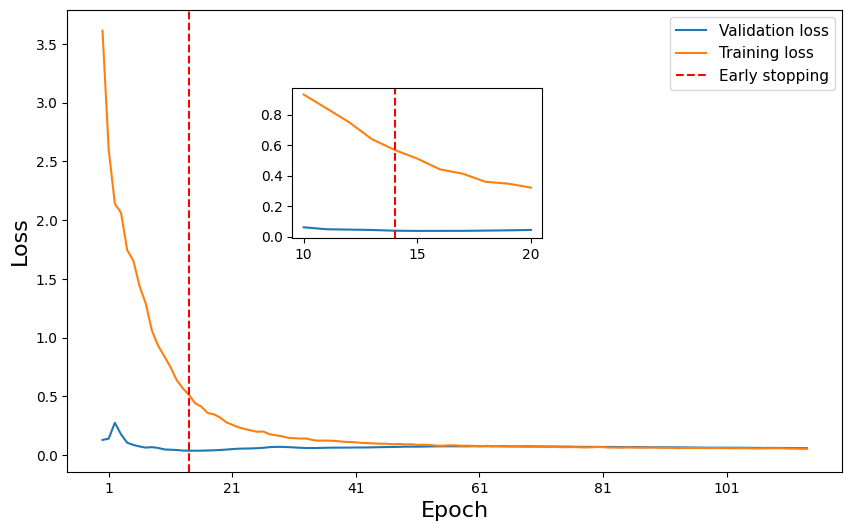

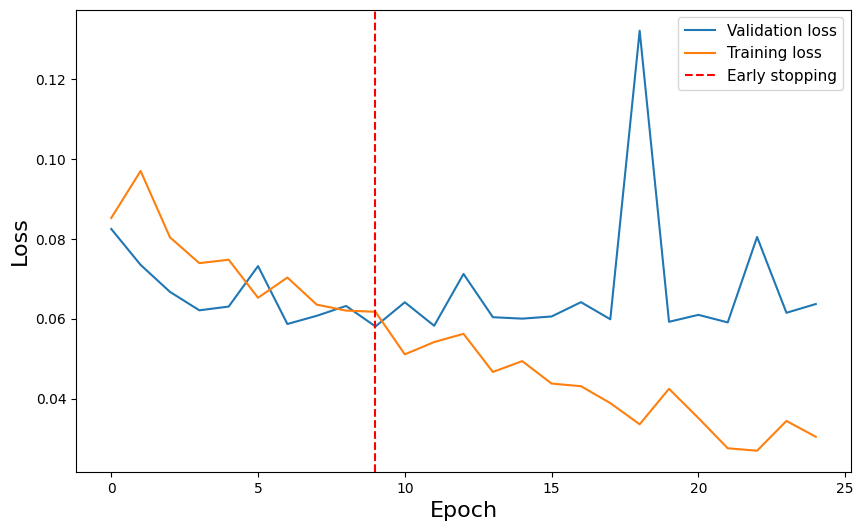

In [208]:


#show_loss_graph_zoomed(dhf_pretrain_val_loss, dhf_pretrain_train_loss, 'DeepHF pre-train loss', context_window=5, early_stopping=8, save_name='dhf_pretrain_loss.png')
#show_loss_graph_zoomed(dhf_moreno_val_loss, dhf_moreno_train_loss, 'DeepHF full-tl morenoMateos2015 loss', early_stopping=15, save_name= 'dhf_moreno_loss.png')
#show_loss_graph_zoomed(co_pretrain_val_loss, co_pretrain_train_loss, 'CRISPRon pretrain loss', early_stopping=100, context_window=25, save_name='co_pretrain_loss.png', first_number=1, jumps=20)
show_loss_graph_zoomed(co_pretrain_val_loss, co_pretrain_train_loss, 'CRISPRon pretrain loss', early_stopping=100, context_window=5, save_name='co_pretrain_loss.png', first_number=1, jumps=20)

#show_loss_graph_zoomed(co_moreno_ll_val_loss, co_moreno_ll_train_loss, 'CRISPRon  last-layer-tl morenoMateos2015 loss', early_stopping=30, context_window=30, no_early_stopping=True, save_name='co_moreno_ll_loss.png')
show_loss_graph_zoomed(co_moreno_val_loss, co_moreno_train_loss, 'CRISPRon  full-tl morenoMateos2015 loss', early_stopping=15, save_name='co_moreno_full_tl_loss.png')


# Sizes vs Performance

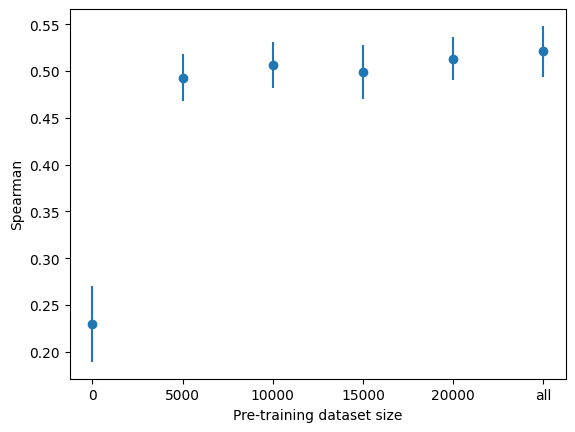

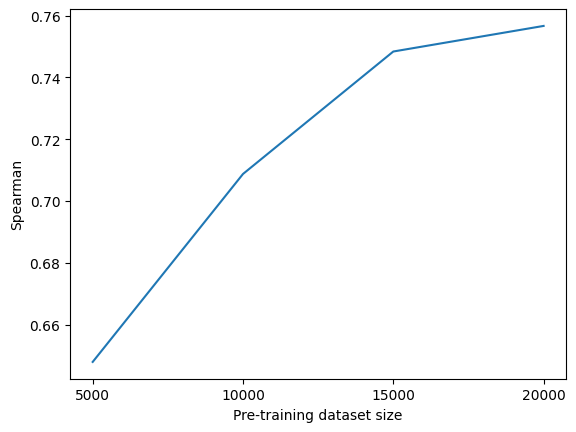

In [209]:
def plot_size_vs_performance(sizes_to_spearman_dict, title, stds_dict=None):
    sizes = list(sizes_to_spearman_dict.keys())
    spearman = [sizes_to_spearman_dict[size] for size in sizes]
    
    # Normalize x-axis to indices
    x_indices = range(len(sizes))
    
    if stds_dict:
        stds = [stds_dict[size] for size in sizes]
        plt.errorbar(x_indices, spearman, yerr=stds, fmt='o')
    else:
        plt.plot(x_indices, spearman)
    
    plt.xlabel('Pre-training dataset size')
    plt.ylabel('Spearman')
    
    # Set x-ticks to sizes and change the largest size to 'all'
    xtick_labels = [str(size) for size in sizes]
    #xtick_labels[-1] = 'all'
    plt.xticks(x_indices, xtick_labels)
    
    # Save the figure with higher DPI
    plt.savefig(title + '.png', dpi=800)
    plt.show()



sizes_to_target_dict = {
    0: [0.2201245593355265, 0.1769059516152971, 0.2514110438119739, 0.20494024354905965, 0.29485267614194544],
    5000: [0.5329477252236564, 0.5084012410683365, 0.47791166929345336, 0.48293531037309795, 0.46209582234912466],
    10000: [0.5456439570634777, 0.5250765066329307, 0.4935211426875208, 0.485271854746945, 0.48323780311115194],
    15000: [0.5233626497275722, 0.5385035090571132, 0.4952371528931168, 0.4745729410351189, 0.4612166144843135],
    20000: [0.5180888086015009, 0.5514456749899287, 0.5109823239640684, 0.5058512555568906, 0.48031040843587225],
    "all": [0.5577790216754648, 0.5498710165310867, 0.5045112409976606, 0.5012050236410797, 0.49229279600822673],
}

sizes_to_target_dict_mean = {}
for size, values in sizes_to_target_dict.items():
    sizes_to_target_dict_mean[size] = np.mean(values)

sizes_to_target_std_dict = {}
for size, values in sizes_to_target_dict.items():
    sizes_to_target_std_dict[size] = np.std(values)

sizes_to_pretrain_dict = {
    5000: 0.6479207548104621,
    10000: 0.7087685393505087,
    15000: 0.7484100139120144,
    20000: 0.7566959653554852,
}


plot_size_vs_performance(sizes_to_target_dict_mean, 'DeepCRISTL morenoMateos2015 performance vs Training Set Size', stds_dict=sizes_to_target_std_dict)      
plot_size_vs_performance(sizes_to_pretrain_dict, 'DeepCRISTL pretrain performance vs Training Set Size')
